In [149]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Load the data from csv file to a dataframe

In [150]:
#Read the data into dataframe
data=pd.read_csv("/content/Cust_Segmentation.csv")
data.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [151]:
#Dropping the unwanted columns from the dataframe
data = data.drop(['Address','Defaulted'],axis=1)

#Displaying the top 5 rows
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,6.3
1,2,47,1,26,100,4.582,8.218,12.8
2,3,33,2,10,57,6.111,5.802,20.9
3,4,29,2,4,19,0.681,0.516,6.3
4,5,47,1,31,253,9.308,8.908,7.2


In [152]:
# statistics of the data
data.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,41.300000


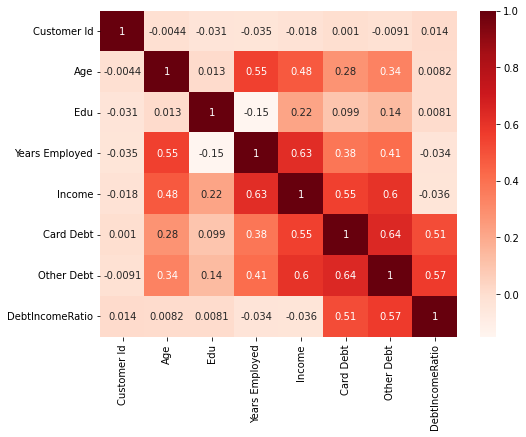

In [153]:
cor=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

Normalising the Data

 K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [154]:
from sklearn.preprocessing import StandardScaler
X = data

#Resizing the values by using fit transformation
#The mean of the result data is 0 and standard deviation is 1

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.7300143 ,  0.74291541,  0.31212243, ..., -0.68381116,
        -0.59048916, -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938, ...,  1.41447366,
         1.51296181,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243, ...,  2.13414111,
         0.80170393,  1.59755385],
       ...,
       [ 1.72186347, -1.24795149,  2.46906604, ...,  0.5766659 ,
         0.03863257,  3.45892281],
       [ 1.72593888, -0.37694723, -0.76634938, ..., -0.68757659,
        -0.70147601, -1.08281745],
       [ 1.7300143 ,  2.1116364 , -0.76634938, ...,  0.13611081,
         0.16463355, -0.2340332 ]])

Modelling the data using Kmeans

The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:

In [155]:
#Setting the cluster count
clusterNum = 6

#Created a kmeans object and assigning parameters
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
#using fit we are training the model
k_means.fit(X)

#copying the lables into a variable
labels = k_means.labels_

In [156]:
#adding a lables column to the dataframe
data["labels"] = labels

data.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,labels
0,1,41,2,6,19,0.124,1.073,6.3,3
1,2,47,1,26,100,4.582,8.218,12.8,3
2,3,33,2,10,57,6.111,5.802,20.9,3
3,4,29,2,4,19,0.681,0.516,6.3,3
4,5,47,1,31,253,9.308,8.908,7.2,3


In [157]:
#Count the labels of different values
data['labels'].value_counts()

4    144
3    143
0    143
2    140
1    140
5    140
Name: labels, dtype: int64

We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results.

Remember in lecture we said that this algorithm randomly initialize the centroids in k-means clustering? Well, this is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values, or the initial cluster centroids, for K-Means.

In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. This is where K-Means++ helps. It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

Using the K-Means++ algorithm, we optimize the step where we randomly pick the cluster centroid. We are more likely to find a solution that is competitive to the optimal K-Means solution while using the K-Means++ initialization.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [158]:
# inertia on the fitted data
k_means.inertia_


2820026.843424972

Elbow Curve

 how can we decide the optimum number of clusters? One thing we can do is plot a graph, also known as an elbow curve, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric. Let’s say inertia for now.

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow that is the “elbow” of the graph.


 We got an inertia value of almost 2600. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

Text(0, 0.5, 'Inertia')

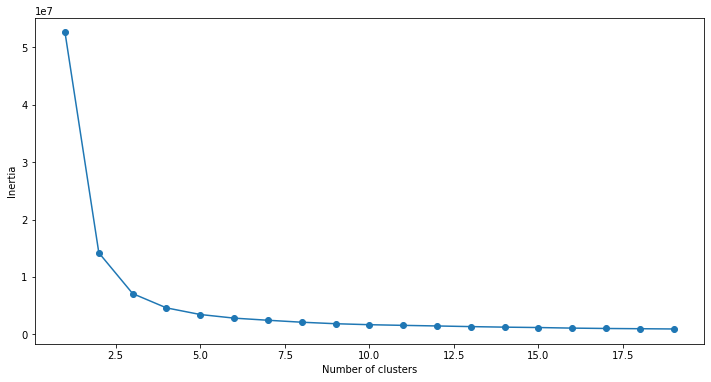

In [159]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

#Defining the figure
plt.figure(figsize=(12,6))

#PLotting the graph
plt.plot(frame['Cluster'], frame['SSE'], marker='o')

#Labelling x and y axis
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Can you tell the optimum cluster value from this plot? Looking at the above elbow curve, we can choose any number of clusters between 5 to 8. Let’s set the number of clusters as 5 and fit the model:

After looking into the Elbow curve, we find the depth from ncluster = 2 to 6


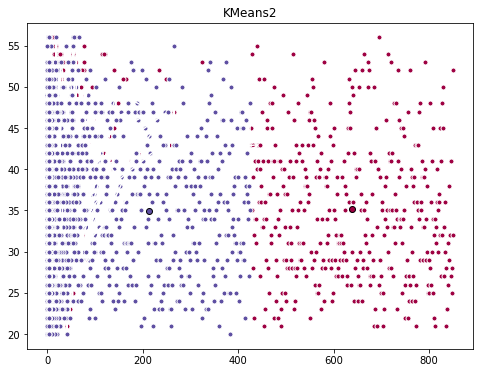

14204074.563856512


In [160]:
#Initializing nclusters to 2 and running the model
k_means2 = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
k_means2.fit(X)

#Initializing the figure
fig = plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means2.labels_))))

#Creating a plot
ax = fig.add_subplot(1, 1, 1)

#for loop for listing the data points and centroids
for k, col in zip(range(data.shape[0]), colors):
        #Listing the data points
        my_members = (k_means2.labels_ == k)

        #Defining the centroids
        cluster_center = k_means2.cluster_centers_[k]
        #plotting points with color
        ax.plot(X.iloc[my_members], X.iloc[my_members, 1], 'w', markerfacecolor=col, marker='.',markersize=10)
        #plotting centroids
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


#Plotting the graph
ax.set_title('KMeans2')
plt.show()

#Displaying the inertia for ncluster =2
print(k_means2.inertia_)

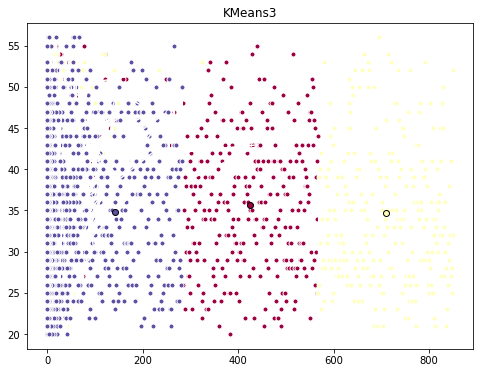

7095034.330735012


In [161]:
#Initializing nclusters to 3 and running the model
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)

#Initializing the figure
fig = plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))

#Creating a plot
ax = fig.add_subplot(1, 1, 1)

#for loop for listing the data points and centroids
for k, col in zip(range(data.shape[0]), colors):
        #Listing the data points
        my_members = (k_means3.labels_ == k)

        #Defining the centroids
        cluster_center = k_means3.cluster_centers_[k]
        #plotting points with color
        ax.plot(X.iloc[my_members], X.iloc[my_members, 1], 'w', markerfacecolor=col, marker='.',markersize=10)
        #plotting centroids
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


#Plotting the graph
ax.set_title('KMeans3')
plt.show()

#Displaying the inertia for ncluster =3
print(k_means3.inertia_)

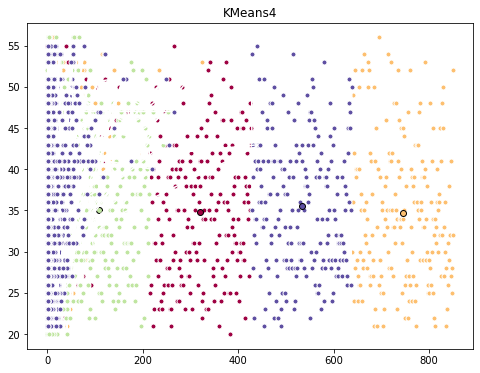

4604665.29668292


In [162]:
#Initializing nclusters to 4 and running the model
k_means4 = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means4.fit(X)

#Initializing the figure
fig = plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means4.labels_))))

#Creating a plot
ax = fig.add_subplot(1, 1, 1)

#for loop for listing the data points and centroids
for k, col in zip(range(data.shape[0]), colors):
        #Listing the data points
        my_members = (k_means4.labels_ == k)

        #Defining the centroids
        cluster_center = k_means4.cluster_centers_[k]
        #plotting points with color
        ax.plot(X.iloc[my_members], X.iloc[my_members, 1], 'w', markerfacecolor=col, marker='.',markersize=10)
        #plotting centroids
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


#Plotting the graph
ax.set_title('KMeans4')
plt.show()

#Displaying the inertia for ncluster =4
print(k_means4.inertia_)

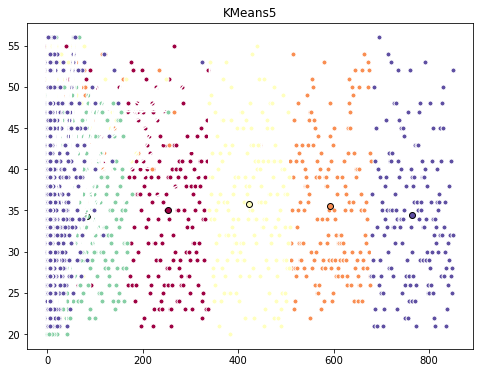

3450198.7794760354


In [163]:
#Initializing nclusters to 5 and running the model
k_means5 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means5.fit(X)

#Initializing the figure
fig = plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means5.labels_))))

#Creating a plot
ax = fig.add_subplot(1, 1, 1)

#for loop for listing the data points and centroids
for k, col in zip(range(data.shape[0]), colors):
        #Listing the data points
        my_members = (k_means5.labels_ == k)

        #Defining the centroids
        cluster_center = k_means5.cluster_centers_[k]
        #plotting points with color
        ax.plot(X.iloc[my_members], X.iloc[my_members, 1], 'w', markerfacecolor=col, marker='.',markersize=10)
        #plotting centroids
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


#Plotting the graph
ax.set_title('KMeans5')
plt.show()

#Displaying the inertia for ncluster =5
print(k_means5.inertia_)

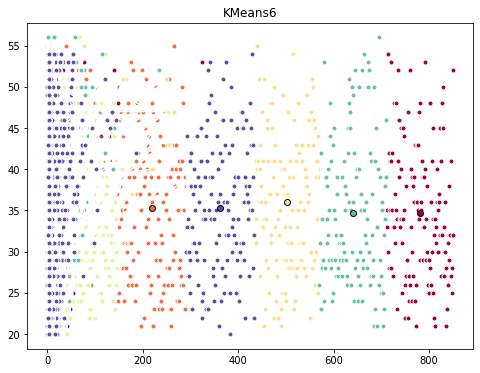

2819312.86615064


In [164]:
#Initializing nclusters to 6 and running the model
k_means6 = KMeans(init = "k-means++", n_clusters = 6, n_init = 12)
k_means6.fit(X)

#Initializing the figure
fig = plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means6.labels_))))

#Creating a plot
ax = fig.add_subplot(1, 1, 1)

#for loop for listing the data points and centroids
for k, col in zip(range(data.shape[0]), colors):
        #Listing the data points
        my_members = (k_means6.labels_ == k)

        #Defining the centroids
        cluster_center = k_means6.cluster_centers_[k]
        #plotting points with color
        ax.plot(X.iloc[my_members], X.iloc[my_members, 1], 'w', markerfacecolor=col, marker='.',markersize=10)
        #plotting centroids
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


#Plotting the graph
ax.set_title('KMeans6')
plt.show()

#Displaying the inertia for ncluster =6
print(k_means6.inertia_)